### Importing packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math

### Reading the data in, and splitting into training and testing sets

In [4]:
input_data = pd.read_csv("train.csv")

In [5]:
input_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [24]:
# Drop ID 
input_data = input_data.drop("id", axis=1)

In [25]:
input_data["target"].unique()

array([0, 1])

In [26]:
Y = input_data["target"]
X = input_data.iloc[:,1:]

In [30]:
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


In [32]:
Y

array([0, 1])

In [35]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=42)

### BEGIN CODING HERE 

Someone should perform initial data analysis, and then model fitting, 
An example of model fitting is shown below

In [64]:
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from plotml import * 

In [65]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_Train, Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
K = 5
scores = cross_val_score(clf, X_Train, Y_Train, cv=K)
scores

array([0.91770071, 0.91798872, 0.91640466, 0.91935581, 0.91844376])

In [43]:
Y_Pred = clf.predict(X_Test)

In [58]:
def make_confusion_matrix(Y_Test, Y_Pred, title="Confusion Matrix Of Target Accuracy"):
    cm = confusion_matrix(Y_Test, Y_Pred)
    plot_confusion_matrix(cm, labels=[0,1], title=title, cmap=plt.cm.Blues)

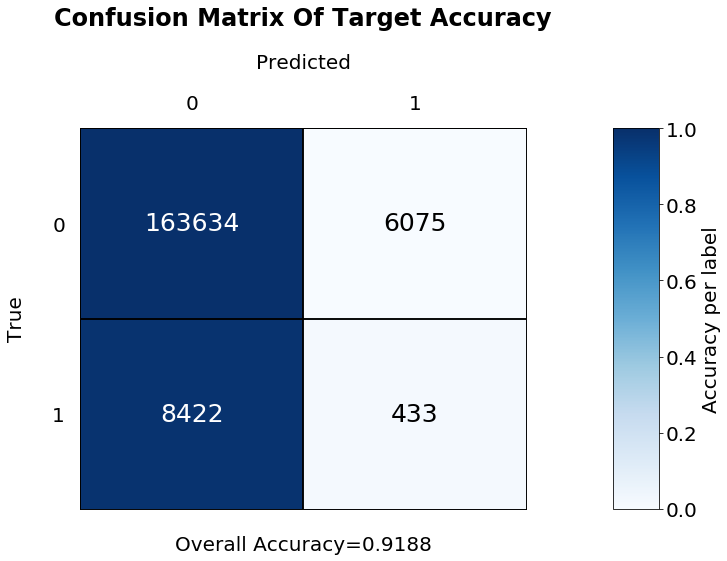

In [59]:
make_confusion_matrix(Y_Pred, Y_Test)

## DO NOT RUN THE GRAPHVIZ, it will require a restart of the kernel because the tree it makes is waaaay to big to visualise

from sklearn.tree import export_graphviz 
from graphviz import Source 
treeviz = export_graphviz(clf,
                            feature_names=X_Train.columns, 
                            class_names=["0","1"])

Source(treeviz)